# Learning Face recognition using OpenCV!

## OpenCV

### Loading using a large scale dataset - Yale Face Database

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
path = '/content/drive/MyDrive/Learning Facial Recognition with OpenCV/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r') #r means read
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [3]:
import os
print(os.listdir("/content/yalefaces/train"))

['subject09.leftlight.gif', 'subject11.rightlight.gif', 'subject03.happy.gif', 'subject11.surprised.gif', 'subject01.rightlight.gif', 'subject03.normal.gif', 'subject13.happy.gif', 'subject12.glasses.gif', 'subject04.happy.gif', 'subject08.surprised.gif', 'subject05.rightlight.gif', 'subject12.noglasses.gif', 'subject05.normal.gif', 'subject07.wink.gif', 'subject11.centerlight.gif', 'subject07.glasses.gif', 'subject05.noglasses.gif', 'subject04.noglasses.gif', 'subject15.leftlight.gif', 'subject12.sad.gif', 'subject03.centerlight.gif', 'subject02.rightlight.gif', 'subject01.sad.gif', 'subject10.sleepy.gif', 'subject07.sleepy.gif', 'subject06.surprised.gif', 'subject06.normal.gif', 'subject15.noglasses.gif', 'subject11.wink.gif', 'subject05.glasses.gif', 'subject03.surprised.gif', 'subject13.rightlight.gif', 'subject14.rightlight.gif', 'subject15.centerlight.gif', 'subject07.rightlight.gif', 'subject14.happy.gif', 'subject05.wink.gif', 'subject06.sleepy.gif', 'subject10.leftlight.gif', 

In [4]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')] #reading the files and joining it as a list into the root directory
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path) <- check the path of the files
    image = Image.open(path).convert('L')
    #print(type(image)) <- get the type of the image to check
    image_np = np.array(image, 'uint8')
    #print(type(image_np)) <- convert to numpy format
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', '')) #split the strings and the name of the files and only take the name of the images
    #print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

  #remove images from c/../../images01.gif to 01

In [5]:
ids, faces = get_image_data()

In [6]:
ids

#id variable store all names of images or the classes.
#each number represent a person

array([ 9, 11,  3, 11,  1,  3, 13, 12,  4,  8,  5, 12,  5,  7, 11,  7,  5,
        4, 15, 12,  3,  2,  1, 10,  7,  6,  6, 15, 11,  5,  3, 13, 14, 15,
        7, 14,  5,  6, 10, 11,  9, 12,  9,  9, 14, 13, 15,  9,  7,  3,  1,
        7,  4, 12, 12, 13,  7, 15, 11, 11,  6, 12,  1,  3,  5,  8, 15,  9,
       14,  9, 10, 11,  8,  1,  3, 15,  2,  2,  3,  2, 10, 14,  8,  1,  6,
        9,  6,  4,  1,  2, 10,  7, 10,  4, 13,  8,  2,  6, 12,  9,  4,  2,
        6, 10,  5,  2,  4,  8,  3, 15,  7, 13, 15, 14,  4, 14, 10, 11,  6,
       14, 10,  1,  4, 12,  1,  5,  2, 14, 13,  8,  8,  8,  5, 13, 13])

In [7]:
len(ids) #check how many images

135

In [9]:
len(faces)

135

In [8]:
faces[0], faces[0].shape #take a look at a single face must make sure all the images have the same shape in this case is 243, 320

#faces variable tore all the pixels of all images

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,  41,  41,  46],
        [255, 255, 255, ...,  41,  40,  44],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [10]:
243 * 320

77760

### Training the LBPH classifier

In [11]:
8 * 8 #each one of the images will have 64 histograms

64

In [12]:
#8
lbph_classifer = cv2.face.LBPHFaceRecognizer_create()
lbph_classifer.train(faces, ids)
lbph_classifer.write("lbph_classifier.yml") #stores as a histogram after it is being train file.yml

Default Variables and their settings are tuned on the comments below but lets change it up!

In [13]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8 <- 8 rows of rows
# grid_y: 8 <- 8 rows of column

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors=14, grid_x = 9, grid_y = 9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml') #stores as a histogram after it is being train file.yml

### Recognizing faces

In [14]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create() #load the classifier
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [15]:
test_image = '/content/yalefaces/test/subject10.sad.gif'

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
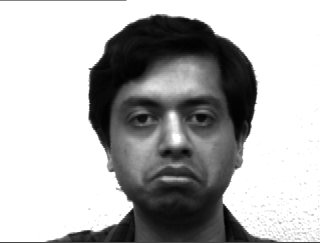

In [16]:
image = Image.open(test_image).convert('L') #conversion test_image to numpy array
image_np = np.array(image, 'uint8')
image_np

In [17]:
image_np.shape

(243, 320)

In [18]:
prediction = lbph_face_classifier.predict(image_np)
prediction

#class = 10, confidence = 6.84750735484425

(10, 36.84750735484425)

In [19]:
prediction[0]

10

Need to extract the expected outputs below

In [20]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

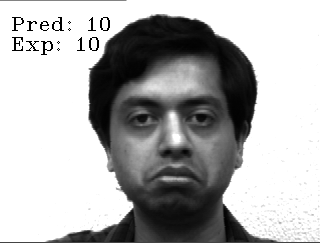

In [21]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [22]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths: #will run through a for loops to run through all the test images and evaluation all the iamges
  #print(path)
  image = Image.open(path).convert('L') #convert to greyscale
  image_np = np.array(image, 'uint8') #convert to numpy
  prediction, _ = lbph_face_classifier.predict(image_np) #we want to get the 2nd variable (confidence)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

  #create two list

In [23]:
type(predictions)

list

In [24]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

#convert them to numpy arrays

In [25]:
type(predictions)

numpy.ndarray

In [26]:
predictions #predictions mades of the images

array([13, 15,  7, 12,  8,  5,  3, 14,  9,  4, 13,  4, 10, 11,  3,  7, 11,
        4,  9,  1,  4, 14, 14,  4, 12, 12,  7,  6,  4,  5])

In [27]:
expected_outputs #true value of the images

array([13, 15,  9,  2,  8,  5,  3,  6,  7,  8, 13,  2, 10, 11,  3,  7, 11,
        1,  9,  1,  4, 14, 14, 10, 12, 12, 15,  6,  4,  5])

In [28]:
from sklearn.metrics import accuracy_score #count for us
accuracy_score(expected_outputs, predictions)

#can predict 70% of the images correctly out of the 15 classes
#must have more than 2 images for each classes due to yales we only got 2 per classes

0.7

In [29]:
len(predictions)

30

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

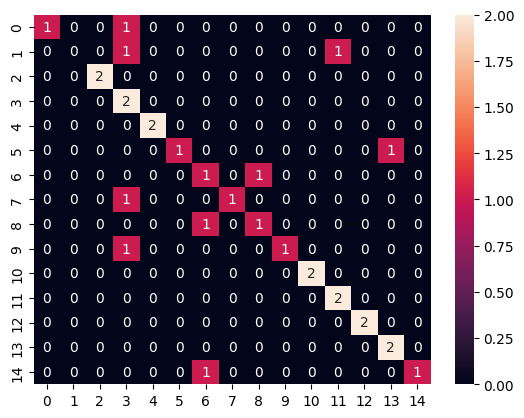

In [31]:
import seaborn
seaborn.heatmap(cm, annot=True); #annot to see the values

# so the left side is the classes for example 1 on the left side subject02, now look at the rows since theres (1) in 3 and 4, this means class 2 was predicted to be subject 4 and 5

## Dlib

In [32]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

### Detecting facial points

In [33]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Learning Facial Recognition with OpenCV/shape_predictor_68_face_landmarks.dat')
#using a pretrain model to predict face by using 68 points in a face to consider that bounding box a face


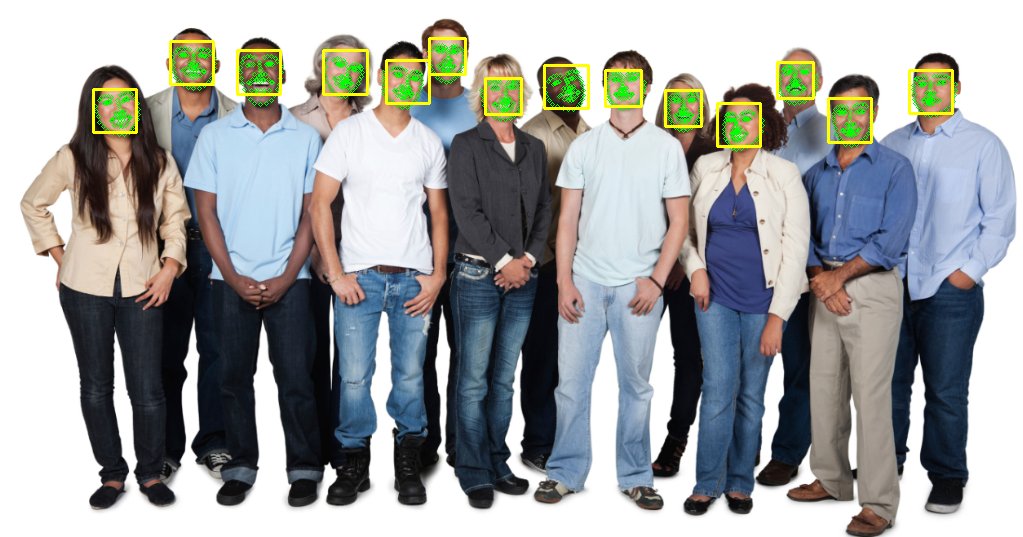

In [34]:
image = cv2.imread('/content/drive/MyDrive/Learning Facial Recognition with OpenCV/people.jpg')
face_detection = face_detector(image, 1)
for face in face_detection:
  points = points_detector(image, face) #extract points only considering bounding box
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1)

  #print(points.parts()) <- get informations about the faces with the points
  #print(len(points.parts())) <-size of the points since we using the models of 68 points

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(image)

**Dlib is better in detecting face than Haar cascade and other classifier, bc it must find points like eyes, nose, mouth. This points here to detect and consider it a face. must always have 68 points**

### Detecting facial descriptors

In [35]:
import os

In [36]:
# Resnet: https://arxiv.org/abs/1512.03385
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Learning Facial Recognition with OpenCV/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Learning Facial Recognition with OpenCV/dlib_face_recognition_resnet_model_v1.dat')


In [40]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [38]:
!nvidia-smi

Mon Mar  3 10:28:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P0             27W /   70W |     152MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [42]:
import torch
print(torch.version.cuda)

12.4


In [44]:
!pip show dlib


Name: dlib
Version: 19.24.2
Summary: A toolkit for making real world machine learning and data analysis applications
Home-page: https://github.com/davisking/dlib
Author: Davis King
Author-email: davis@dlib.net
License: Boost Software License
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [45]:
!conda install cudatoolkit=12.4 -c nvidia -y


/bin/bash: line 1: conda: command not found


In [43]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [46]:
!pip uninstall dlib -y
!pip install dlib --force-reinstall

Found existing installation: dlib 19.24.2
Uninstalling dlib-19.24.2:
  Successfully uninstalled dlib-19.24.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp311-cp311-linux_x86_64.whl size=4490667 sha256=6e30c3a2bafd1a888950d5b640ef4a7bb3c910bd8e4406bca160730ec0679a03
  Stored in directory: /root/.cache/pip/wheels/fe/c7/1f/c778b9f7cc6d8d0da4f6697f619f9eb5a49d54d2a2c8267f3c
Successfully built dlib


In [1]:
!conda install cudatoolkit=12.4 -c nvidia -y


/bin/bash: line 1: conda: command not found


In [37]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path) <- going through each images in the path
  image = Image.open(path).convert('RGB') #convert to RGB for openCV
  image_np = np.array(image, 'uint8') #convert to numpy format, pixels input as integer values
  face_detection = face_detector(image_np, 1) #creating the dlib
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)

    points = points_detector(image_np, face) #creating the points detector, send 68 points to the nn and makes calculations and return informations about each faces
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)

    #face descriptor using convolutional network
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points) #send full image (image_np) and all the green points (points)
    #print(type(face_descriptor))
    #print(len(face_descriptor))
    #print(face_descriptor)
    face_descriptor = [f for f in face_descriptor] #need put into a list format as it originally was jst a single line of info so make into a list of infos of each faces
    #print(face_descriptor)
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64) #different format, remove the comma of each of the list.
    ce_descriptor = face_descriptor[np.newaxis, :] #add a new dimension to the face_descriptor shape, was (128,) now is (1, 128) #was a vector now we have a matrix
    #print(face_descriptor.shape)
    #print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0) #need concat the desc of each one of the faces in a single variable, axis = 0 means will add one row of each of the faces

    index[idx] = path
    idx += 1
  #cv2_imshow(image_np)

RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /root/.cache/uv/sdists-v7/pypi/dlib/19.24.2/HN0OssoMs-3ZpaRSI9QUo/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.

### **We extracted 68 points of the faces of each one of the images we send to our face descriptor, running as a convol neural network.**

### **This neural network will receive as inputs the 68 points and return 128 values which represent the best features of each one of the faces.**

In [ ]:
face_descriptors.shape #132 images and each one of the images has 128 values that related to each faces. instead of pixels it is descriptors

In [ ]:
face_descriptors

In [ ]:
len(index)

In [ ]:
index

### Calculating the distance between faces

**In order to predict if a face is a subject A, B, etc. Need calculate the distance using NumPy.**

In [ ]:
face_descriptors[131] #index as above pick from 0 to 131

*Lower the distances, the higher the similarity between faces*

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm
np.linalg.norm(face_descriptors[131] - face_descriptors[131])

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[130])

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[129])

In [ ]:
np.linalg.norm(face_descriptors[80] - face_descriptors[123])

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1) #comparing with all the indexes

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)) #get the lower values in the matrixs

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)[36]

### Detecting faces with Dlib

*make sure thresholds are tuned properly if not alot of faces wont be identified*

In [ ]:
threshold = 0.5 #choose distances between faces in order to consider lower or higher faces
predictions = []
expected_outputs = []

paths = [os.path.join('/content/meandc', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  #cv2_imshow(image_np) <- check the images we using is correct
  face_detection = face_detector(image_np, 1) #scale of the image
  for face in face_detection:
    points = points_detector(image_np, face) #get the 68 points
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor] #convert the values to a list
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64) #convert numpy array
    face_descriptor = face_descriptor[np.newaxis, :] #add a new dimension on the variable

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', '')) #processed the index
    else:
      name_pred = 'Not identified' #if the min distance is not less or equal than the thresholds will consider its not identified.
#in case not new faces in the dataset then will print this error ^
    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


  cv2_imshow(image_np)

predictions = np.array(predictions) #convert to numpy array
expected_outputs = np.array(expected_outputs)

In [ ]:
predictions

In [ ]:
expected_outputs

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

## Homework

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import zipfile
path = '/content/drive/MyDrive/Learning Facial Recognition with OpenCV/meandclarice.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [42]:
def get_image_data():
  paths = [os.path.join('/content/meandclarice', f) for f in os.listdir('/content/meandclarice')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])

    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [43]:
import os

ids, faces = get_image_data()

In [44]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [45]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

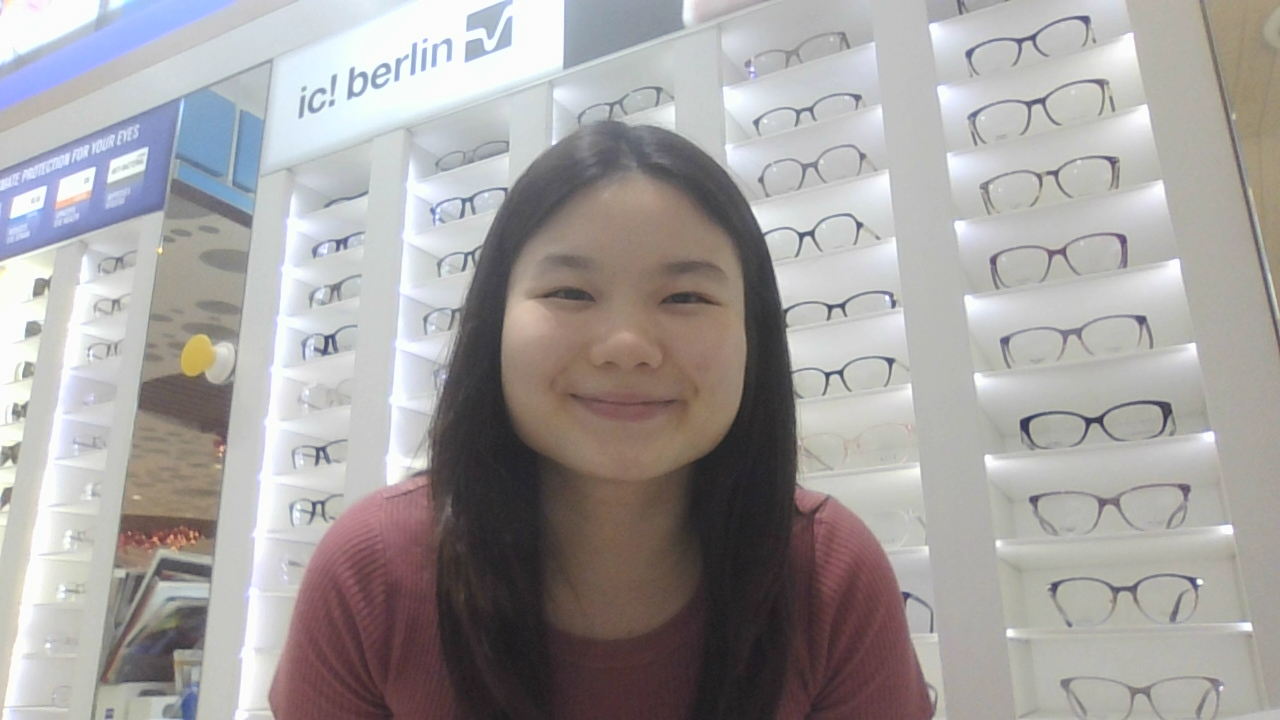

In [46]:
image = Image.open('/content/meandclarice/person.2.7.jpeg')
image

In [47]:
paths = [os.path.join('/content/meandclarice', f) for f in os.listdir('/content/meandclarice')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import shutil

directory_path = "/content/meandclarice"

# Delete the directory and its contents
shutil.rmtree(directory_path)